<a href="https://colab.research.google.com/github/sixth-group/project2/blob/main/Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1O4YR4UBatOLnaP4gMHbmFw7UJvhhxFwq
!gdown 1-7aMdKW4KcCKLwoUKC3XxdIwfIKkzwx6
!unzip -q train_data.zip
!unzip -q test_data.zip

Downloading...
From: https://drive.google.com/uc?id=1O4YR4UBatOLnaP4gMHbmFw7UJvhhxFwq
To: /content/train_data.zip
100% 173M/173M [00:05<00:00, 31.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7aMdKW4KcCKLwoUKC3XxdIwfIKkzwx6
To: /content/test_data.zip
100% 73.0M/73.0M [00:03<00:00, 24.0MB/s]


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import EfficientNetV2L

# Set up the directory paths
train_data_dir = '/content/train_data'
input_size = (480, 480)

# Create an ImageDataGenerator for both training and validation data
train_data_generator = ImageDataGenerator(vertical_flip=True,
                                         horizontal_flip=True,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         validation_split=0.2)

valid_data_generator = ImageDataGenerator(validation_split=0.2)

# Use flow_from_directory to generate batches of data
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=64,
    class_mode='categorical',
    subset='training',
    seed=22
)

validation_generator = valid_data_generator.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    seed=22
)

# Load the pre-trained EfficientNetV2 model
base_model = EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(480, 480, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom head to the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming you have 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Found 7994 images belonging to 10 classes.
Found 1996 images belonging to 10 classes.
473176280/473176280 [==============================] - 22s 0us/step
Epoch 1/10
125/125 [==============================] - 883s 7s/step - loss: 1.4594 - accuracy: 0.5096 - val_loss: 1.1626 - val_accuracy: 0.6037
Epoch 2/10
125/125 [==============================] - 798s 6s/step - loss: 1.1199 - accuracy: 0.6258 - val_loss: 1.0773 - val_accuracy: 0.6408
Epoch 3/10
125/125 [==============================] - 799s 6s/step - loss: 0.9655 - accuracy: 0.6725 - val_loss: 1.0852 - val_accuracy: 0.6448
Epoch 4/10
125/125 [==============================] - 797s 6s/step - loss: 0.8530 - accuracy: 0.7125 - val_loss: 1.0826 - val_accuracy: 0.6498
Epoch 5/10
125/125 [==============================] - 796s 6s/step - loss: 0.7642 - accuracy: 0.7437 - val_loss: 1.0331 - val_accuracy: 0.6728
Epoch 6/10
125/125 [==============================] - 771s 6s/step - loss: 0.6608 - accuracy: 0.7780 - val_loss: 1.0847 - val_accur

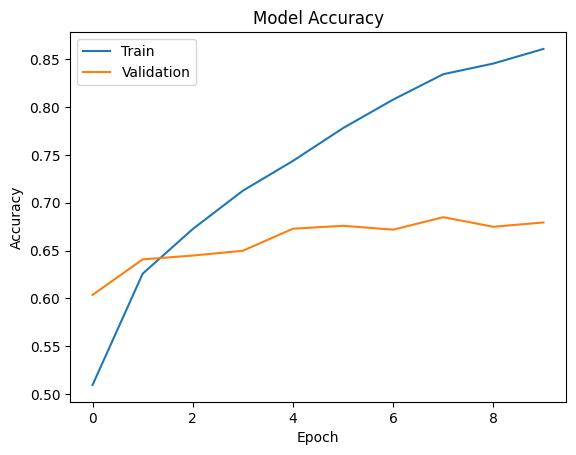

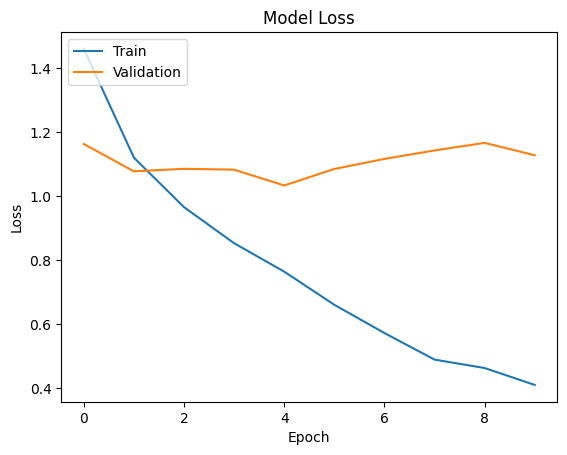

32/32 [==============================] - 113s 3s/step - loss: 1.1275 - accuracy: 0.6794
Validation Loss: 1.1275
Validation Accuracy: 0.6794


In [3]:
import matplotlib.pyplot as plt

# Visualize training and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Visualize training and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

2/2 [==============================] - 3s 2s/step


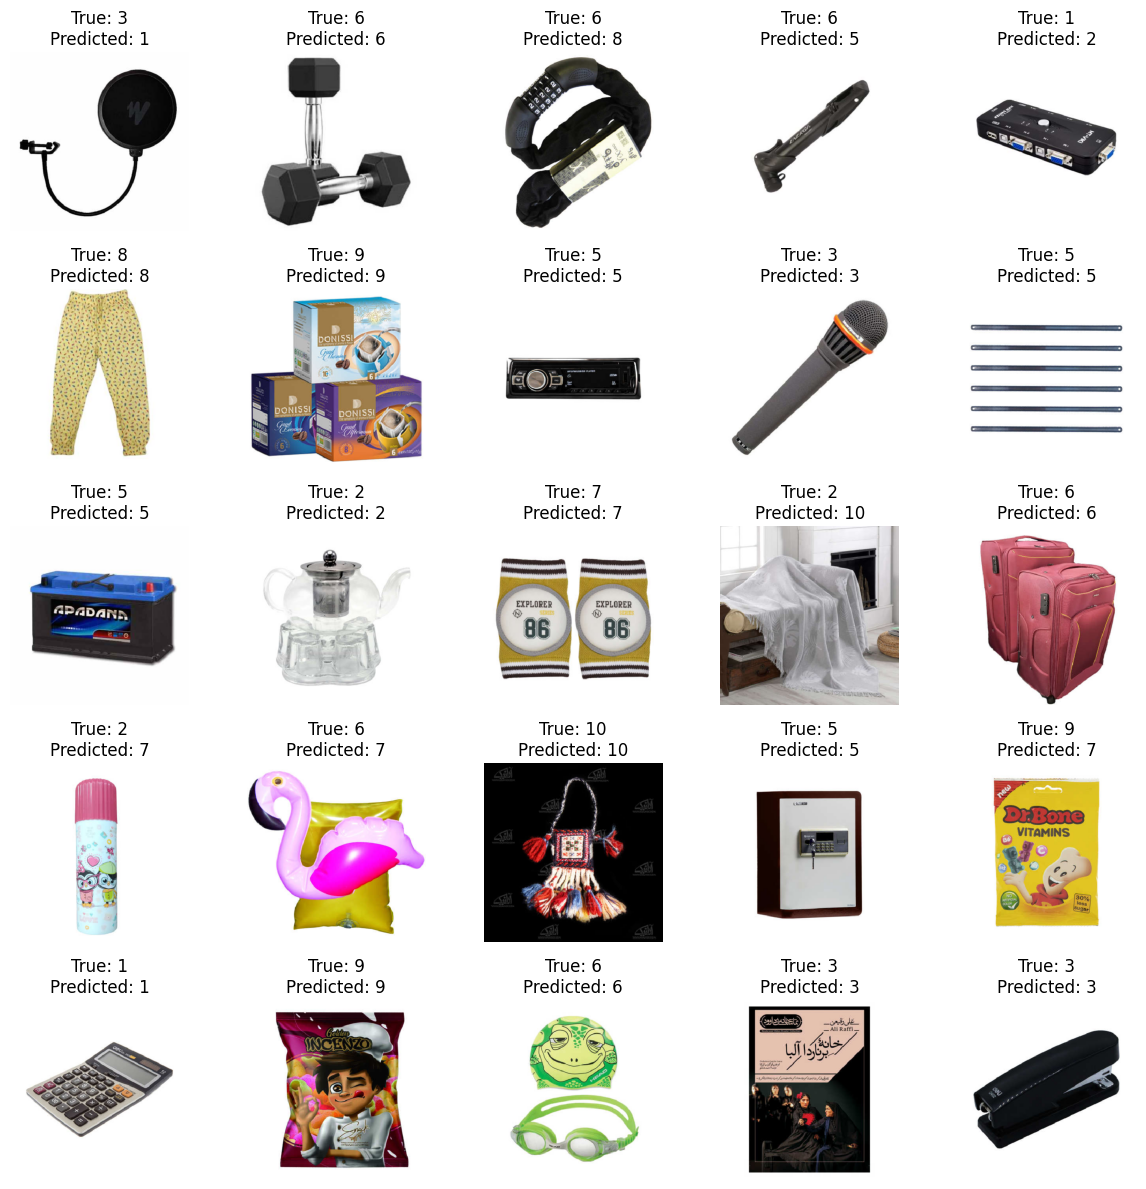

In [6]:
import numpy as np

# Get a batch of images and labels from the validation generator
images, labels = validation_generator.next()

# Make predictions on the batch of images
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Visualize the images and compare the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
for i, ax in enumerate(axes.flatten()):
    # Normalize the image pixel values to the range [0, 1]
    normalized_image = images[i] / 255.0

    # Display the image
    ax.imshow(normalized_image)
    ax.axis('off')

    # Get the true and predicted class labels
    true_label = class_labels[np.argmax(labels[i])]
    predicted_label = class_labels[predicted_classes[i]]

    # Set the title with the true and predicted labels
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}')

plt.tight_layout()
plt.show()